<a href="https://colab.research.google.com/github/nannthd/project_AIEngineer/blob/main/license_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
!pip install easyocr

In [ ]:
!pip install pytube opencv-python-headless

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Custom Training

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AWtZRbYK04sFZNNZ1t4X")
project = rf.workspace("projectaiengineer").project("license-plates-gpj5f")
version = project.version(2)
dataset = version.download("yolov8")

In [ ]:
%cat {dataset.location}/data.yaml

In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
%cat {dataset.location}/data.yaml

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train epochs=20 imgsz=640 batch=8 plots=True \
model=yolov8n.pt \
data={dataset.location}/data.yaml \
dropout=0.3

In [ ]:
!ls {HOME}/runs/detect/train/

In [ ]:
from IPython.display import Image, clear_output

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [ ]:
!pip install supervision
import supervision as sv

In [ ]:
from ultralytics import YOLO

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


WARNING ⚠️ NMS time limit 0.550s exceeded
0: 640x640 1 number, 1 province, 12.0ms
Speed: 3.7ms preprocess, 12.0ms inference, 715.0ms postprocess per image at shape (1, 3, 640, 640)


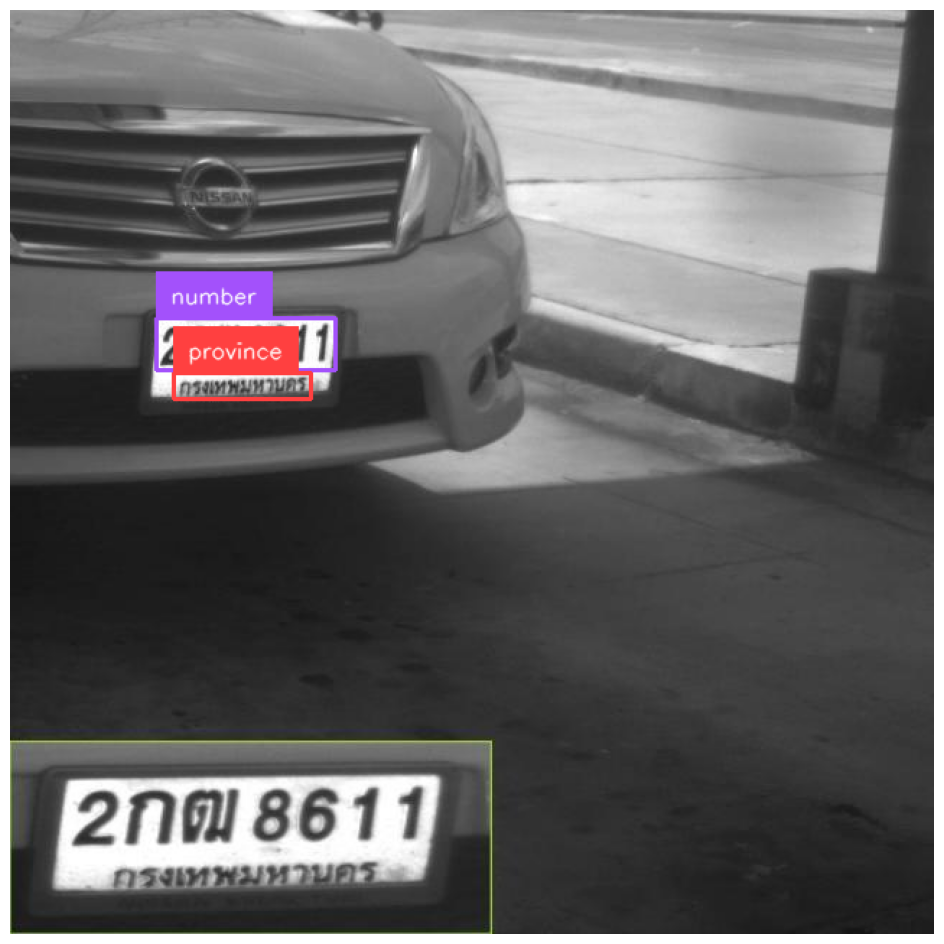

In [ ]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [ ]:
image_test = '/content/-license-plates-2/test/images'

In [ ]:
pred = model.predict(image_test, save=True)
pred

In [ ]:
pred = model.predict(image_test, save_crop=True)
pred

In [ ]:
for image_idx, image_test in enumerate(images_test):  # วนลูปทุกภาพในชุดภาพทดสอบ
    predictions = model(image_test, save_txt=None)

    with open(f"predicted_labels_{image_idx}.txt", '+w') as file:
        for idx, prediction in enumerate(predictions[0].boxes.xywhn):
            cls = int(predictions[0].boxes.cls[idx].item())
            file.write(f"{cls} {prediction[0].item()} {prediction[1].item()} {prediction[2].item()} {prediction[3].item()}\n")

In [ ]:
predictions = model(image_test, save_txt=None)

with open("predicted_labels.txt", '+w') as file:
      for idx, prediction in enumerate(predictions[0].boxes.xywhn): # change final attribute to desired box format
          cls = int(predictions[0].boxes.cls[idx].item())
          # Write line to file in YOLO label format : cls x y w h
          file.write(f"{cls} {prediction[0].item()} {prediction[1].item()} {prediction[2].item()} {prediction[3].item()}\n")

In [ ]:
len(pred)

85

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directory = '/content/runs/detect/predict'

# ตรวจสอบว่าไดเรกทอรีนี้มีไฟล์ภาพหรือไม่
if os.path.isdir(directory):
    # หากมีไฟล์ภาพในไดเรกทอรี
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # แสดงภาพทีละภาพ
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = mpimg.imread(image_path)

        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')  # ปิดแกน X และ Y
        plt.show()
else:
    print("ไม่พบไดเรกทอรีที่ระบุ")

In [ ]:
import numpy as np
import cv2
import os

# ฟังก์ชันเพื่อทำการพยากรณ์และบันทึกผลลัพธ์ลงในไฟล์
def predict_and_save(model, image_val, save_path="predictions.txt"):
    results = model.predict(image_val)

    # ดึงค่าตำแหน่งจากผลลัพธ์
    pred = []
    for result in results:
        for box in result.boxes:
            if len(box.xywh) >= 4:
                x, y, w, h = box.xywh[0], box.xywh[1], box.xywh[2], box.xywh[3]
                pred.append([x.item(), y.item(), w.item(), h.item()])

    # แปลงค่าพยากรณ์เป็น string เพื่อบันทึกลงไฟล์
    pred_str = "\n".join(",".join(map(str, coords)) for coords in pred)

    with open(save_path, "w") as file:
        file.write(pred_str)
    return np.array(pred)

# เรียกใช้ฟังก์ชันที่สร้างขึ้น
pred = predict_and_save(model, image_val)

# ฟังก์ชันเพื่ออ่านค่าพยากรณ์จากไฟล์
def load_predictions(file_path):
    with open(file_path, "r") as file:
        pred_str = file.readlines()
    # แปลงค่าจาก string เป็น list ของตัวเลข
    pred = [list(map(float, line.strip().split(','))) for line in pred_str]
    return np.array(pred)

pred_from_file = load_predictions("predictions.txt")

# ฟังก์ชันเพื่อครอปภาพตามตำแหน่งที่พยากรณ์
def crop_image(image, coords):
    x, y, w, h = map(int, coords)
    return image[y:y+h, x:x+w]

# สมมติว่า image_val เป็น numpy array ของภาพ
image = cv2.imread("/content/-license-plates-2/valid/images/CH1_20150510114626_1-8888_jpg.rf.5e7e9479b2b5b53ec594f655c1706a17.jpgg")  # หรือใช้ PIL เช่น Image.open("path_to_your_image.jpg")

# สร้างโฟลเดอร์สำหรับเก็บรูปที่ครอป (ถ้ายังไม่มี)
output_dir = "cropped_images"
os.makedirs(output_dir, exist_ok=True)

# ทำการครอปภาพโดยใช้ค่าพยากรณ์ที่อ่านมาจากไฟล์
cropped_images = [crop_image(image, coords) for coords in pred_from_file]

# บันทึกภาพที่ครอปแล้วในโฟลเดอร์ที่ระบุ
for i, cropped_img in enumerate(cropped_images):
    output_path = os.path.join(output_dir, f"cropped_image_{i}.jpg")
    cv2.imwrite(output_path, cropped_img)


image 1/1 /content/-license-plates-2/valid/images/CH1_20150510114626_1-8888_jpg.rf.5e7e9479b2b5b53ec594f655c1706a17.jpg: 640x640 1 number, 1 province, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


#Read Text From Image

In [ ]:
!pip install pytesseract
!pip install pillow
!apt install tesseract-ocr

In [ ]:
!git clone https://github.com/tesseract-ocr/tessdata

Cloning into 'tessdata'...
remote: Enumerating objects: 771, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 771 (delta 0), reused 1 (delta 0), pack-reused 768
Receiving objects: 100% (771/771), 3.17 GiB | 14.40 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Updating files: 100% (172/172), done.


In [ ]:
%cd /content/tessdata

/content/tessdata


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CH1_20150510232130_-7927_jpg.rf.e4aed6b69094c135218daeb35a9281b4.jpg to CH1_20150510232130_-7927_jpg.rf.e4aed6b69094c135218daeb35a9281b4.jpg


In [ ]:
from PIL import Image
import pytesseract

def extract_text_from_image(image_file):
  image = Image.open(image_file)
  text = pytesseract.image_to_string(image)
  return text

image_path = "/content/CH1_20150510232130_-7927_jpg.rf.e4aed6b69094c135218daeb35a9281b4.jpg"

extracted_text = extract_text_from_image(image_path)
print(extracted_text)